### Подключение библиотек

In [603]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
)
from sklearn import preprocessing

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE, ADASYN

### Описание столбцов

    Agent - ID туристического агентства, которое сделало заказ
    Company - ID компании / юридического лица, совершившего бронирование или ответственного за его оплату

       0   hotel                           object   Тип отеля
       1   is_canceled                     int64    Значение, указывающее, было ли бронирование отменено (1) или нет (0) 
       2   lead_time                       int64    Количество дней, прошедших между датой ввода бронирования в систему и датой прибытия  
       3   arrival_date_year               int64    Год прибытия
       4   arrival_date_month              object   Месяц прибытия
       5   arrival_date_week_number        int64    ??????????
       6   arrival_date_day_of_month       int64    Число прибытия
       7   stays_in_weekend_nights         int64    Количество ночей в выходные (суббота или воскресенье), которые гость проживал или забронировал для проживания в отеле
       8   stays_in_week_nights            int64    Количество ночей в неделю (с понедельника по пятницу), которые гость останавливался или забронировал для проживания в отеле
       9   adults                          int64    Количество взрослых
       10  children                        float64  Количество детей
       11  babies                          int64    Количество младенцев
       12  meal                            object   Тип забронированного питания. Категории представлены в стандартных пакетах гостеприимства:
              Undefined / SC - без питания;
              BB - завтрак;
              HB - завтрак и еще один прием пищи - обычно ужин;
              FB - завтрак, обед и ужин   
       13  country                         object   Страна   
       14  market_segment                  object   Обозначение сегмента рынка. В категориях термин «ТА» означает «Туристические агенты», а «ТО» означает «Туроператоры»
       15  distribution_channel            object   Канал распространения бронирования. Термин «ТА» означает «Туристические агенты», а «ТО» означает «Туроператоры» 
       16  is_repeated_guest               int64    Значение, указывающее, было ли имя бронирования от повторного гостя (1) или нет (0)
       17  previous_cancellations          int64    Количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования
       18  previous_bookings_not_canceled  int64    Количество предыдущих бронирований, которые не были отменены клиентом до текущего бронирования
       19  reserved_room_type              object   Код типа номера забронирован
       20  assigned_room_type              object   Код для типа номера, назначенного для бронирования. Иногда назначенный тип номера отличается от типа зарезервированного номера по причинам, связанным с работой отеля (например, из-за избыточного бронирования) или по запросу клиента   
       21  booking_changes                 int64    Количество изменений / дополнений, внесенных в бронирование с момента внесения бронирования в систему до момента заселения или отмены
       22  deposit_type                    object   Индикация того, внес ли клиент залог для гарантии бронирования. Эта переменная может принимать три категории:
              No Deposit – депозит не вносился
              Non Refund - внесен залог в размере полной стоимости проживания
              Refundable - внесен залог в размере, меньшем общей стоимости проживания   
       23  days_in_waiting_list            int64    Количество дней, в течение которых бронирование находилось в листе ожидания, прежде чем оно было подтверждено клиенту
       24  customer_type                   object   Тип бронирования, предполагающий одну из четырех категорий: Contract, Group, Transient, Transient-party
       25  adr                             float64  Средняя цена за номер/ночь  
       26  required_car_parking_spaces     int64    Количество машиномест, требуемых заказчиком
       27  total_of_special_requests       int64    Количество особых запросов, сделанных клиентом (например, две односпальные кровати или высокий этаж)
       28  reservation_status_date         object   Дата, когда был установлен последний статус. Эта переменная может использоваться вместе с ReservationStatus, чтобы понять, когда было отменено бронирование или когда клиент выписался из отеля

### Считываение файлов

In [604]:
train = pd.read_csv("train_final.csv")
test = pd.read_csv("test_final.csv")

## Знакомство с данными

### Поиск пустых значений

In [605]:
print(f"train - {train.shape}, null - {train.isna().sum().sum()}")
print(f"test - {test.shape}, null - {test.isna().sum().sum()}")

train - (44638, 29), null - 0
test - (23525, 28), null - 0


### Нахождение полностью одинаковых строк

In [606]:
# Нахождение полностью одинаковых строк
duplicates = train[train.duplicated(keep="first") & ~train.duplicated()]
duplicates

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date


In [607]:
duplicates = test[test.duplicated(keep="first") & ~test.duplicated()]
duplicates

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date


### Информация о столбцах

In [608]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           44638 non-null  object 
 1   is_canceled                     44638 non-null  int64  
 2   lead_time                       44638 non-null  int64  
 3   arrival_date_year               44638 non-null  int64  
 4   arrival_date_month              44638 non-null  object 
 5   arrival_date_week_number        44638 non-null  int64  
 6   arrival_date_day_of_month       44638 non-null  int64  
 7   stays_in_weekend_nights         44638 non-null  int64  
 8   stays_in_week_nights            44638 non-null  int64  
 9   adults                          44638 non-null  int64  
 10  children                        44638 non-null  float64
 11  babies                          44638 non-null  int64  
 12  meal                            

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,3,2016,February,7,12,0,2,2,...,E,F,0,No Deposit,0,Transient,81.0,1,0,2016-02-14
1,City Hotel,1,50,2016,November,47,18,1,2,2,...,A,A,0,No Deposit,0,Transient,93.6,0,2,2016-10-09
2,City Hotel,0,14,2015,September,37,7,1,5,2,...,F,F,0,No Deposit,0,Contract,166.0,0,3,2015-09-13
3,City Hotel,0,18,2015,December,50,6,2,0,2,...,A,A,0,No Deposit,0,Transient,107.0,0,0,2015-12-08
4,City Hotel,1,263,2016,September,40,29,2,4,2,...,A,A,0,No Deposit,0,Transient,100.3,0,0,2016-01-18


In [609]:
test.info()
test.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23525 entries, 0 to 23524
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           23525 non-null  object 
 1   lead_time                       23525 non-null  int64  
 2   arrival_date_year               23525 non-null  int64  
 3   arrival_date_month              23525 non-null  object 
 4   arrival_date_week_number        23525 non-null  int64  
 5   arrival_date_day_of_month       23525 non-null  int64  
 6   stays_in_weekend_nights         23525 non-null  int64  
 7   stays_in_week_nights            23525 non-null  int64  
 8   adults                          23525 non-null  int64  
 9   children                        23525 non-null  float64
 10  babies                          23525 non-null  int64  
 11  meal                            23525 non-null  object 
 12  country                         

,hotel,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,City Hotel,73,2016,July,28,6,0,2,1,0.0,...,A,A,0,No Deposit,0,Transient,107.10,0,0,2016-06-12
1,City Hotel,37,2015,October,43,24,2,5,1,1.0,...,A,A,0,No Deposit,0,Transient,87.78,0,0,2015-10-31
2,City Hotel,190,2017,April,14,6,2,3,2,0.0,...,A,A,0,No Deposit,0,Transient,88.40,0,0,2016-09-29
3,City Hotel,287,2016,August,35,24,1,4,2,0.0,...,B,B,1,No Deposit,0,Transient,76.71,0,0,2016-08-29
4,Resort Hotel,386,2016,October,43,20,1,3,2,0.0,...,A,A,0,No Deposit,0,Transient-Party,49.00,0,0,2016-09-14


In [610]:
train.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,44638.000000,44638.000000,44638.00000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000
mean,0.297594,99.395291,2016.15675,27.095166,15.778328,0.931516,2.507303,1.852883,0.102424,0.008289,0.034052,0.069672,0.140799,0.238026,2.149133,101.624687,0.067723,0.603253
std,0.457205,104.485734,0.70504,13.654692,8.807604,1.002021,1.928111,0.578898,0.393273,0.091649,0.181364,0.726281,1.540109,0.682989,17.134385,48.429930,0.255077,0.803659
min,0.000000,0.000000,2015.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,2016.00000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.380000,0.000000,0.000000
50%,0.000000,65.000000,2016.00000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,0.000000,0.000000
75%,1.000000,154.000000,2017.00000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.00000,53.000000,31.000000,16.000000,40.000000,55.000000,3.000000,2.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


In [611]:
test.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000,23525.000000
mean,125.809097,2016.165271,27.211860,15.768799,0.927269,2.523996,1.880468,0.107715,0.005909,0.021679,0.159787,0.080680,0.155494,2.867715,103.662482,0.028735,0.439490
std,114.095246,0.712181,13.355065,8.806106,0.998991,1.879689,0.598199,0.407852,0.077743,0.145636,1.210472,1.246059,0.564539,19.061344,58.362793,0.167574,0.727468
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,34.000000,2016.000000,17.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.750000,0.000000,0.000000
50%,94.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,188.000000,2017.000000,38.000000,24.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,629.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,40.000000,3.000000,2.000000,1.000000,26.000000,66.000000,17.000000,391.000000,5400.000000,2.000000,5.000000


In [612]:
# Выбрем признаки, которые являются категориальными (строковыми)
train.loc[:, train.dtypes == object]

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,February,BB,PRT,Direct,Direct,E,F,No Deposit,Transient,2016-02-14
1,City Hotel,November,BB,BEL,Online TA,TA/TO,A,A,No Deposit,Transient,2016-10-09
2,City Hotel,September,BB,ITA,Online TA,TA/TO,F,F,No Deposit,Contract,2015-09-13
3,City Hotel,December,BB,ESP,Online TA,TA/TO,A,A,No Deposit,Transient,2015-12-08
4,City Hotel,September,BB,DEU,Online TA,TA/TO,A,A,No Deposit,Transient,2016-01-18
...,...,...,...,...,...,...,...,...,...,...,...
44633,City Hotel,June,BB,JPN,Online TA,TA/TO,D,D,No Deposit,Transient,2017-06-28
44634,Resort Hotel,September,BB,GBR,Online TA,TA/TO,E,F,No Deposit,Transient,2015-10-03
44635,City Hotel,April,SC,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,2017-02-09
44636,City Hotel,September,HB,NOR,Offline TA/TO,TA/TO,A,A,No Deposit,Transient-Party,2016-09-12


In [613]:
train.loc[:, train.dtypes == object].columns

Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status_date'],
      dtype='object')

In [614]:
for colum in train.loc[:, train.dtypes == object].columns:
    print(train[colum].value_counts())
    print('-'*30)

hotel
City Hotel      29335
Resort Hotel    15303
Name: count, dtype: int64
------------------------------
arrival_date_month
August       5232
July         4712
May          4336
October      4207
April        4118
June         4100
September    3826
March        3678
February     3106
November     2577
December     2483
January      2263
Name: count, dtype: int64
------------------------------
meal
BB           34424
HB            5479
SC            4038
Undefined      445
FB             252
Name: count, dtype: int64
------------------------------
country
PRT    16999
GBR     4914
FRA     4207
ESP     3382
DEU     2957
       ...  
MRT        1
DMA        1
LCA        1
ETH        1
CAF        1
Name: count, Length: 156, dtype: int64
------------------------------
market_segment
Online TA        21325
Offline TA/TO     9085
Groups            6868
Direct            4922
Corporate         2046
Complementary      308
Aviation            84
Name: count, dtype: int64
---------------------

<Axes: xlabel='arrival_date_week_number', ylabel='Count'>

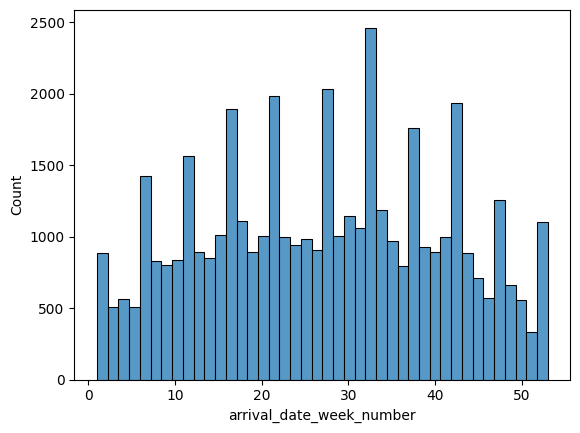

In [615]:
sns.histplot(train["arrival_date_week_number"])

## Обработка данных

### Предобработка

In [616]:
train["meal"] = train["meal"].replace({"Undefined": "SC"})
test["meal"] = train["meal"].replace({"Undefined": "SC"})

In [617]:
train["children"] = train["children"].astype(int)
test["children"] = train["children"].astype(int)

train["children"] = train["children"].astype(int)
test["children"] = train["children"].astype(int)

In [618]:
# print(train["meal"].value_counts())
print(train["arrival_date_month"].value_counts())

arrival_date_month
August       5232
July         4712
May          4336
October      4207
April        4118
June         4100
September    3826
March        3678
February     3106
November     2577
December     2483
January      2263
Name: count, dtype: int64


### Добавление новых фичей

In [619]:
# Функция для сравнения значений и создания новой колонки
def check_room_match(row):
    if row["reserved_room_type"] == row["assigned_room_type"]:
        return False
    else:
        return True

In [620]:
# Применение функции к датасету для создания новой колонки, отвечающей за совпадение или нет брони и фактического номера
test["Rooms_Match"] = test.apply(check_room_match, axis=1)
train["Rooms_Match"] = train.apply(check_room_match, axis=1)

In [621]:
# Создание столбца с датой из трех столбцов
train["arrival_date"] = pd.to_datetime(
    test.arrival_date_year.astype(str)
    + "-"
    + test.arrival_date_month
    + "-"
    + test.arrival_date_day_of_month.astype(str)
)

test["arrival_date"] = pd.to_datetime(
    test.arrival_date_year.astype(str)
    + "-"
    + test.arrival_date_month
    + "-"
    + test.arrival_date_day_of_month.astype(str)
)

# Определение дня недели
test["day_of_week"] = test["arrival_date"].dt.day_name()
train["day_of_week"] = train["arrival_date"].dt.day_name()

In [622]:
# Удаление столбца 'arrival_date'
train = train.drop("arrival_date", axis=1)
test = test.drop("arrival_date", axis=1)

### Удаление бесполезных признаков

In [623]:
train = train.drop(
    columns=[
        "country",
        "reserved_room_type",
        "assigned_room_type",
        "arrival_date_year",
        "arrival_date_day_of_month",
        "arrival_date_week_number",
        "days_in_waiting_list",
        "reservation_status_date",
    ],
    axis=1,
)
test = test.drop(
    columns=[
        "country",
        "reserved_room_type",
        "assigned_room_type",
        "arrival_date_year",
        "arrival_date_day_of_month",
        "arrival_date_week_number",
        "days_in_waiting_list",
        "reservation_status_date",
    ],
    axis=1,
)

### Кодировка

In [624]:
train.loc[:, train.dtypes == object].columns

Index(['hotel', 'arrival_date_month', 'meal', 'market_segment',
       'distribution_channel', 'deposit_type', 'customer_type', 'day_of_week'],
      dtype='object')

In [625]:
train = pd.get_dummies(
    train,
    columns=[
        "hotel",
        "meal",
        "distribution_channel",
        "market_segment",
        "deposit_type",
        "customer_type",
        "day_of_week",
        "arrival_date_month",
    ],
)
test = pd.get_dummies(
    test,
    columns=[
        "hotel",
        "meal",
        "distribution_channel",
        "market_segment",
        "deposit_type",
        "customer_type",
        "day_of_week",
        "arrival_date_month",
    ],
)

In [626]:
train.info()
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44638 entries, 0 to 44637
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     44638 non-null  int64  
 1   lead_time                       44638 non-null  int64  
 2   stays_in_weekend_nights         44638 non-null  int64  
 3   stays_in_week_nights            44638 non-null  int64  
 4   adults                          44638 non-null  int64  
 5   children                        44638 non-null  int32  
 6   babies                          44638 non-null  int64  
 7   is_repeated_guest               44638 non-null  int64  
 8   previous_cancellations          44638 non-null  int64  
 9   previous_bookings_not_canceled  44638 non-null  int64  
 10  booking_changes                 44638 non-null  int64  
 11  adr                             44638 non-null  float64
 12  required_car_parking_spaces     

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,arrival_date_month_May,arrival_date_month_November,arrival_date_month_October,arrival_date_month_September
0,0,3,0,2,2,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
1,1,50,1,2,2,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
2,0,14,1,5,2,2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True
3,0,18,2,0,2,0,0,0,0,0,...,True,False,False,False,False,False,False,False,False,False
4,1,263,2,4,2,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True


### Анализ данных

In [627]:
df = train

In [628]:
df["is_canceled"].value_counts()

is_canceled
0    31354
1    13284
Name: count, dtype: int64

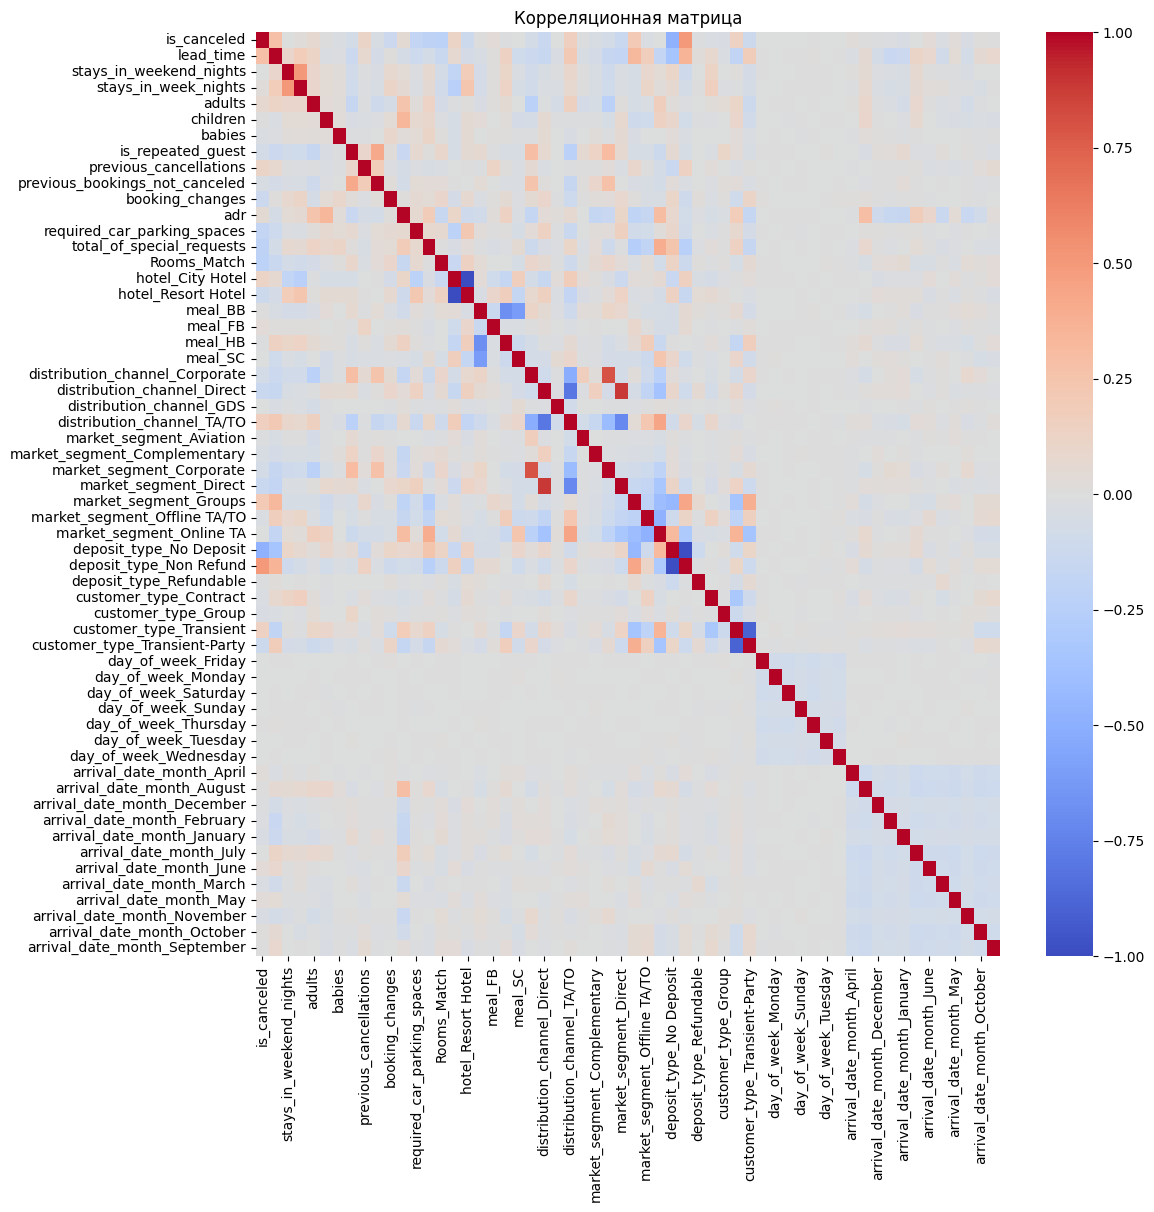

In [629]:
# Построение корреляционной матрицы
correlation_matrix = df.corr()

# Визуализация корреляционной матрицы с использованием heatmap
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Корреляционная матрица")
plt.show()

In [630]:
correlation_with_target = df.corrwith(df["is_canceled"])
# Вывести матрицу корреляции
for index, value in correlation_with_target.items():
    print(f"{index.ljust(30)} {value:.3f}")

is_canceled                    1.000
lead_time                      0.281
stays_in_weekend_nights        -0.005
stays_in_week_nights           0.022
adults                         0.063
children                       0.005
babies                         -0.027
is_repeated_guest              -0.076
previous_cancellations         0.114
previous_bookings_not_canceled -0.045
booking_changes                -0.129
adr                            0.053
required_car_parking_spaces    -0.173
total_of_special_requests      -0.215
Rooms_Match                    -0.225
hotel_City Hotel               0.123
hotel_Resort Hotel             -0.123
meal_BB                        0.007
meal_FB                        0.035
meal_HB                        -0.014
meal_SC                        -0.003
distribution_channel_Corporate -0.071
distribution_channel_Direct    -0.136
distribution_channel_GDS       -0.006
distribution_channel_TA/TO     0.160
market_segment_Aviation        -0.011
market_segment_Compleme

In [631]:
df.max()

is_canceled                           1
lead_time                           737
stays_in_weekend_nights              16
stays_in_week_nights                 40
adults                               55
children                              3
babies                                2
is_repeated_guest                     1
previous_cancellations               26
previous_bookings_not_canceled       72
booking_changes                      21
adr                               510.0
required_car_parking_spaces           8
total_of_special_requests             5
Rooms_Match                        True
hotel_City Hotel                   True
hotel_Resort Hotel                 True
meal_BB                            True
meal_FB                            True
meal_HB                            True
meal_SC                            True
distribution_channel_Corporate     True
distribution_channel_Direct        True
distribution_channel_GDS           True
distribution_channel_TA/TO         True


In [632]:
df.describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,adr,required_car_parking_spaces,total_of_special_requests
count,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000,44638.000000
mean,0.297594,99.395291,0.931516,2.507303,1.852883,0.102424,0.008289,0.034052,0.069672,0.140799,0.238026,101.624687,0.067723,0.603253
std,0.457205,104.485734,1.002021,1.928111,0.578898,0.393273,0.091649,0.181364,0.726281,1.540109,0.682989,48.429930,0.255077,0.803659
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.380000,0.000000,0.000000
50%,0.000000,65.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000,0.000000,0.000000
75%,1.000000,154.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,16.000000,40.000000,55.000000,3.000000,2.000000,1.000000,26.000000,72.000000,21.000000,510.000000,8.000000,5.000000


<Axes: xlabel='adr', ylabel='Count'>

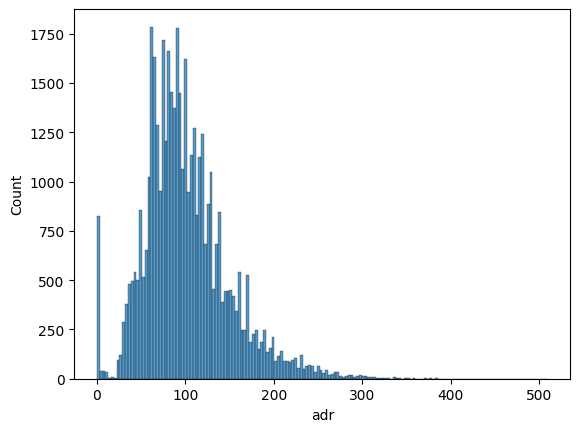

In [633]:
sns.histplot(df["adr"])

<Axes: xlabel='lead_time', ylabel='Count'>

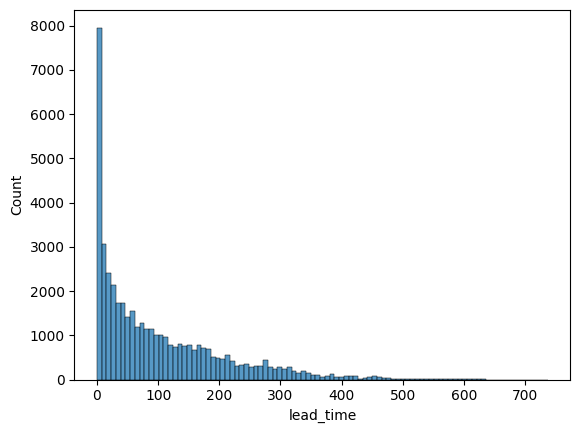

In [634]:
sns.histplot(df["lead_time"])

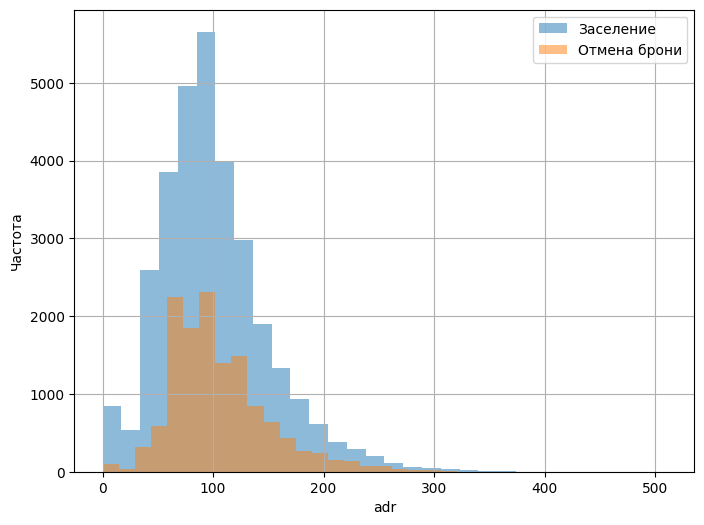

In [635]:
# Создание двух датасетов: один для значений признака при target_column = 0, другой - при target_column = 1
name = "adr"
data_feature_0 = df[df["is_canceled"] == 0][name]
data_feature_1 = df[df["is_canceled"] == 1][name]

# Построение гистограммы для каждого датасета
plt.figure(figsize=(8, 6))
plt.grid()
plt.hist(data_feature_0, bins=30, alpha=0.5, label="Заселение")
plt.hist(data_feature_1, bins=30, alpha=0.5, label="Отмена брони")
plt.xlabel(name)
plt.ylabel("Частота")
plt.legend()
plt.show()

### Нормализация

In [636]:
df.columns[(df > 1).any()]

Index(['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
       'adults', 'children', 'babies', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

In [637]:
scaler = MinMaxScaler()

columns_to_normalize = df.columns[(df > 1).any()]

test[columns_to_normalize] = scaler.fit_transform(test[columns_to_normalize])
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

<Axes: xlabel='adr', ylabel='Count'>

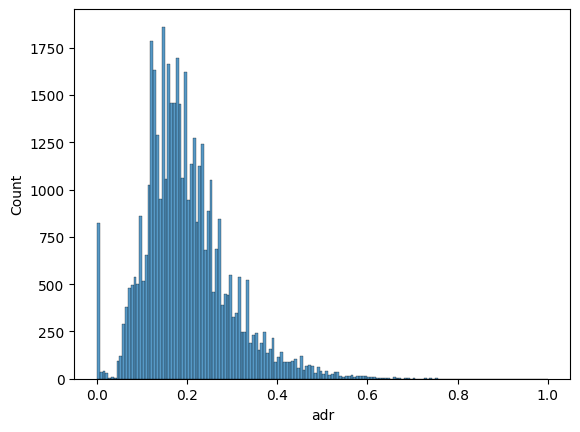

In [638]:
sns.histplot(df["adr"])

<Axes: xlabel='lead_time', ylabel='Count'>

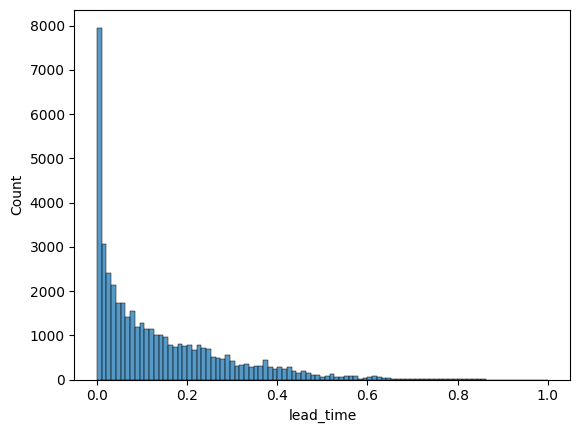

In [639]:
sns.histplot(df["lead_time"])

## Обучение

### Разделение на выборки

In [640]:
df["is_canceled"].value_counts()

is_canceled
0    31354
1    13284
Name: count, dtype: int64

In [641]:
# Выделим из набора данных вектор признаков и вектор ответов
X = df.drop(columns=["is_canceled"])
y = df["is_canceled"]

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (44638, 57)
Target shape: (44638,)


In [642]:
# Балансировка классов
os = SMOTE(random_state=0)

column = X.columns

print("До балансировки данных")
print(X.shape)
print(y.value_counts())

X, y = os.fit_resample(X, y)
os_data_X = pd.DataFrame(data=X, columns=column)
os_data_y = pd.DataFrame(data=y, columns=["is_canceled"])

print("После балансировки")
print(X.shape)
print(y.value_counts())

До балансировки данных
(44638, 57)
is_canceled
0    31354
1    13284
Name: count, dtype: int64


После балансировки
(62708, 57)
is_canceled
0    31354
1    31354
Name: count, dtype: int64


In [643]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Train dataset size: {X_train.shape}, {y_train.shape}")
print(f"Train dataset size: {X_test.shape}, {y_test.shape}")

Train dataset size: (50166, 57), (50166,)
Train dataset size: (12542, 57), (12542,)


### Модель

In [644]:
# # НЕ ЗАПУСКАТЬ!!
# # Задаем сетку параметров для перебора
# param_grid = {
#     "C": [0.5, 1, 2],  # параметр регуляризации
#     "penalty": ["l1"],  # тип регуляризации
#     "solver": ["liblinear"],  # алгоритм оптимизации
#     "class_weight": ["balanced"],  # веса классов
# }

# # Инициализируем модель
# model = LogisticRegression()

# # Создаем объект GridSearchCV
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring="accuracy")

# # Обучение модели с перебором гиперпараметров
# grid_search.fit(X_train, y_train)

# # Получение лучших параметров
# best_params = grid_search.best_params_

In [645]:
best_params

{'C': 1,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'solver': 'liblinear',
 'random_state': 52}

In [646]:
# 1 {"C": 100, "class_weight": None, "penalty": "l1", "solver": "liblinear"}
# 2 {"C": 1, "class_weight": 'balanced', "penalty": "l1", "solver": "liblinear"}

best_params = {
    "C": 1,
    "class_weight": "balanced",
    "penalty": "l1",
    "solver": "liblinear",
    "random_state": 52,
}

In [647]:
# Использование лучших параметров для обучения окончательной модели
best_model = LogisticRegression(**best_params)
best_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=52,
                   solver='liblinear')

In [648]:
# предсказание ответов для тестовой выборки
y_pred = best_model.predict(X_test)

## Анализ результатов обучения

In [649]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"f1_score: {f1_score(y_test, y_pred)}")

Accuracy: 0.7906235050231223
Precision: 0.8029540114132259
Recall: 0.7671584348941629
f1_score: 0.7846481876332623


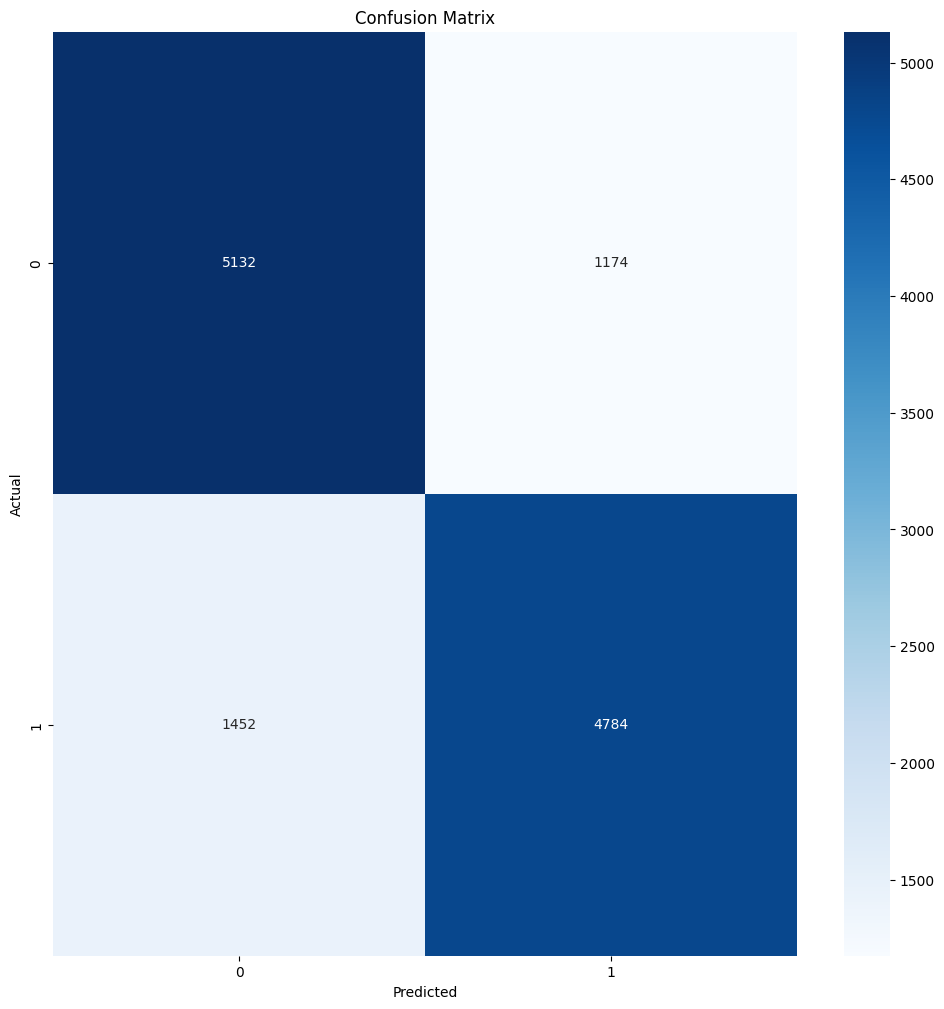

In [650]:
# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

# Визуализация матрицы ошибок с помощью heatmap из библиотеки seaborn
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [651]:
# Получение весов модели (коэффициенты перед признаками)
weights = best_model.coef_[0]  # Достаем коэффициенты из массива (если используется один класс)

feature_names = X.columns

# Сопоставление признаков и их весов
feature_weights = dict(zip(feature_names, weights))

# Вывод названий признаков и их весов
for feature, weight in feature_weights.items():
    print(f"{weight:.2f}  {feature.ljust(20)}")

2.94  lead_time           
0.41  stays_in_weekend_nights
1.27  stays_in_week_nights
7.05  adults              
0.02  children            
0.84  babies              
-1.21  is_repeated_guest   
63.89  previous_cancellations
-17.98  previous_bookings_not_canceled
-7.64  booking_changes     
2.28  adr                 
-43.73  required_car_parking_spaces
-3.77  total_of_special_requests
-1.75  Rooms_Match         
1.58  hotel_City Hotel    
1.78  hotel_Resort Hotel  
3.17  meal_BB             
3.45  meal_FB             
3.03  meal_HB             
3.23  meal_SC             
3.01  distribution_channel_Corporate
2.12  distribution_channel_Direct
1.96  distribution_channel_GDS
3.08  distribution_channel_TA/TO
2.64  market_segment_Aviation
3.38  market_segment_Complementary
2.95  market_segment_Corporate
3.62  market_segment_Direct
3.13  market_segment_Groups
2.47  market_segment_Offline TA/TO
3.80  market_segment_Online TA
0.29  deposit_type_No Deposit
5.56  deposit_type_Non Refund
0.00  depos

## Финальный предикт

In [652]:
model_f = LogisticRegression(**best_params)
model_f.fit(X, y)

LogisticRegression(C=1, class_weight='balanced', penalty='l1', random_state=52,
                   solver='liblinear')

In [653]:
y_pred_test = model_f.predict(test)

In [654]:
y_pred_test = pd.DataFrame(y_pred_test, columns=["is_canceled"])
y_pred_test = y_pred_test.reset_index()

In [655]:
y_pred_test.to_csv("predict 12.csv", index=False)